<a href="https://colab.research.google.com/github/rafpank/Colab/blob/main/data_science_bootcamp%20/wprowadzenie/05_appstore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.__version__

'2.2.2'

Załadowanie danych

In [3]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Wstępne przygotowanie danych - preprocessing

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,17007.00,1059613815.45,299967589.36,284921427.00,899654330.00,1112286228.00,1286982837.00,1475076711.00
Average User Rating,7561.00,4.06,0.75,1.00,3.50,4.50,4.50,5.00
User Rating Count,7561.00,3306.53,42322.56,5.00,12.00,46.00,309.00,3032734.00
Price,16983.00,0.81,7.84,0.00,0.00,0.00,0.00,179.99
Size,17006.00,115706429.89,203647677.85,51328.00,22950144.00,56768954.00,133027072.00,4005591040.00


In [9]:
df_raw.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [10]:
df = df_raw.copy() #zrobienie kopi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

Usuwanie niepotrzebnych kolumn

In [11]:
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.00,3553.00,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.50,284.00,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.00,8376.00,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.50,190394.00,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.50,28.00,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.00,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.00,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.00,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.00,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


In [12]:
df = df.drop(columns=['URL', 'Icon URL', 'Subtitle','Description', 'In-app Purchases'])
df.head()

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.00,8376.00,0.00,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.50,190394.00,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.50,28.00,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [13]:
df = df.set_index('ID')
df

,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
ID,,,,,,,,,,,,
284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.00,8376.00,0.00,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.50,190394.00,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.50,28.00,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1474626442,Stack Puzzle : Rise Tower,NaN,NaN,0.00,Zhigang Pei,4+,EN,64795648.00,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
1474919257,EachOther,NaN,NaN,0.00,Sultan Shindi,4+,EN,110341120.00,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
1474962324,Rabbit Vs Tortoise,NaN,NaN,0.00,Vishal Baldha,4+,EN,23207936.00,Games,"Games, Strategy",3/08/2019,3/08/2019


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average User Rating,7561.00,4.06,0.75,1.00,3.50,4.50,4.50,5.00
User Rating Count,7561.00,3306.53,42322.56,5.00,12.00,46.00,309.00,3032734.00
Price,16983.00,0.81,7.84,0.00,0.00,0.00,0.00,179.99
Size,17006.00,115706429.89,203647677.85,51328.00,22950144.00,56768954.00,133027072.00,4005591040.00


Wyświetalnie informacji o danych typu 'object'

In [16]:
df.describe(include=['object']).T #Wyświetlanie statystyk dla danych typu 'object'

,count,unique,top,freq
Name,17007,16847,Additions,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [17]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head(8)

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
ID,,,,,,,,,,,,
284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.00,8376.00,0.00,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.50,190394.00,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.50,28.00,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
286210009,Sudoku - Classic number puzzle,3.00,47.00,0.00,OutOfTheBit Ltd,4+,EN,48672768.00,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
286313771,Gravitation,2.50,35.00,0.00,Robert Farnum,4+,NaN,6328320.00,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
286363959,Colony,2.50,125.00,0.99,Chris Haynes,4+,EN,64333824.00,Games,"Games, Strategy, Board",3/08/2008,3/10/2018


In [18]:
df.average_user_rating

,average_user_rating
ID,
284921427,4.00
284926400,3.50
284946595,3.00
285755462,3.50
285831220,3.50
...,...
1474626442,NaN
1474919257,NaN
1474962324,NaN


#Jak zbadac rozkład zmiennej?

In [28]:
df.head(2)

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
ID,,,,,,,,,,,,
284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018


In [31]:
df.primary_genre.value_counts() #pozwala sprawdzic jak często dany element pojawiał się w naszej kolumnie. W tym wypadku poszczegolne słowa w wierszach

,count
primary_genre,
Games,16286
Education,222
Entertainment,198
Utilities,77
Sports,60
Reference,32
Stickers,29
Finance,18
Business,16


In [34]:
df.primary_genre.value_counts().nlargest(5) #wyciągnięcie 5 najbardziej popularnych gatunków

,count
primary_genre,
Games,16286
Education,222
Entertainment,198
Utilities,77
Sports,60


In [35]:
df.primary_genre.value_counts().nlargest(10).index

Index(['Games', 'Education', 'Entertainment', 'Utilities', 'Sports',
       'Reference', 'Stickers', 'Finance', 'Business', 'Productivity'],
      dtype='object', name='primary_genre')

In [36]:
list[df.primary_genre.value_counts().nlargest(10).index]

list[Index(['Games', 'Education', 'Entertainment', 'Utilities', 'Sports',
       'Reference', 'Stickers', 'Finance', 'Business', 'Productivity'],
      dtype='object', name='primary_genre')]

In [37]:
df.age_rating.value_counts() #Pandas odczytał to jako int

,count
age_rating,
4+,11806
9+,2481
12+,2055
17+,665


In [38]:
type(df.age_rating.value_counts())

pandas.core.series.Series

<Axes: xlabel='age_rating'>

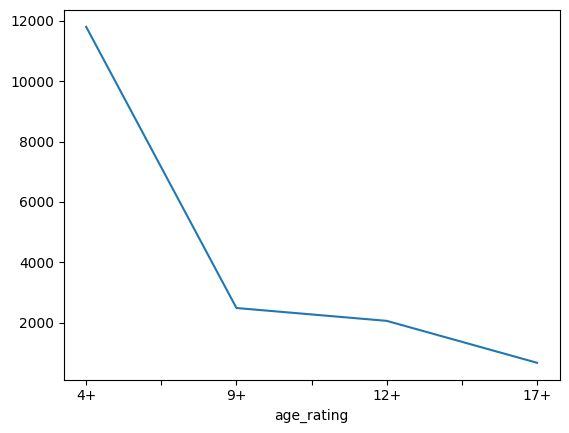

In [39]:
df.age_rating.value_counts().plot()

<Axes: xlabel='age_rating'>

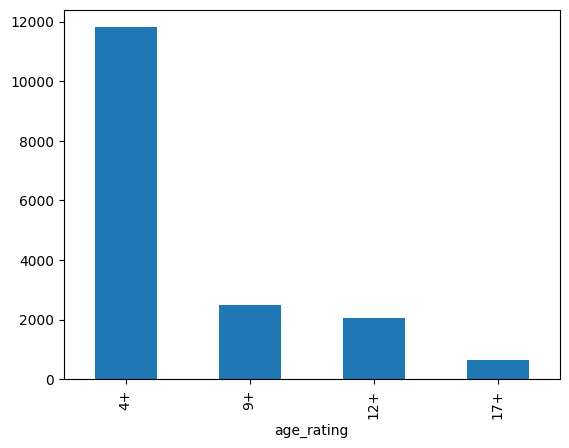

In [40]:
df.age_rating.value_counts().plot(kind='bar')

In [43]:
import seaborn as sns
sns.set()

<Axes: xlabel='age_rating'>

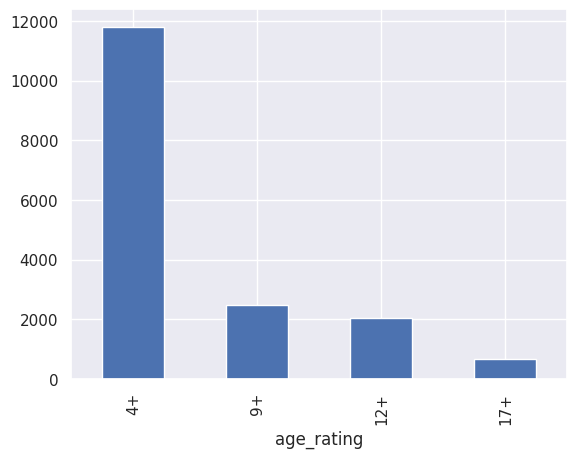

In [45]:
df.age_rating.value_counts().plot(kind='bar') #troche się zmienił sposób wyświetlania

<Axes: ylabel='count'>

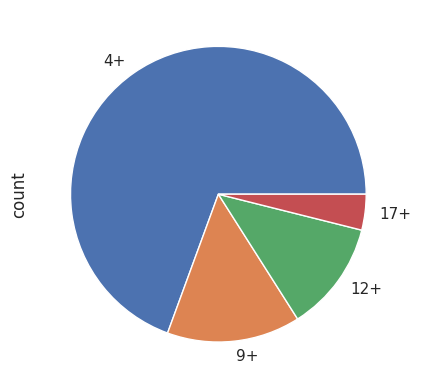

In [47]:
df.age_rating.value_counts().plot(kind='pie')

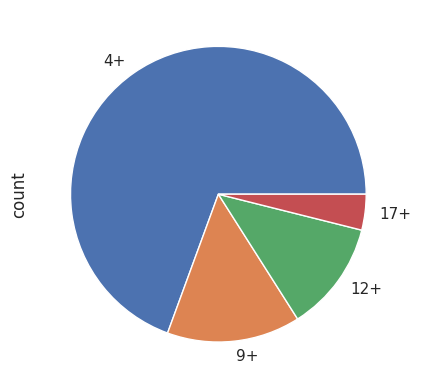

In [49]:
#jeżeli nie chcemy opisu na górze wykresu to możemy przypisać cały wykres do jakiejś zmiennej. Jeżeli nie potrzebujemy dalej ten zmiennej to stosuje się znak "_"
_ = df.age_rating.value_counts().plot(kind='pie')

In [50]:
df.price

,price
ID,
284921427,2.99
284926400,1.99
284946595,0.00
285755462,0.00
285831220,2.99
...,...
1474626442,0.00
1474919257,0.00
1474962324,0.00


In [52]:
df.price.value_counts()

,count
price,
0.00,14212
0.99,1078
1.99,515
2.99,471
4.99,237
3.99,163
9.99,88
11.99,59
5.99,42


In [54]:
df.average_user_rating.value_counts()

,count
average_user_rating,
4.50,2861
4.00,1722
5.00,990
3.50,925
3.00,514
2.50,317
2.00,158
1.50,60
1.00,14


In [55]:
df.languages

,languages
ID,
284921427,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT..."
284926400,EN
284946595,EN
285755462,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT..."
285831220,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU..."
...,...
1474626442,EN
1474919257,EN
1474962324,EN


In [56]:
df.languages.value_counts()

,count
languages,
EN,12467
"EN, ZH",354
"CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR",277
"EN, ZH, ZH",248
"EN, DE",147
...,...
"DA, NL, EN, FI, FR, DE, IT, JA, KO, NO, PL, PT, RU, ZH, ES, SV, ZH, TR, UK",1
"EN, FR, IT, JA, KO, PT, RU, ES, TR",1
"DA, NL, EN, FR, DE, IT, NB, PL, PT, ZH, ES, SV, ZH, TR",1


praca z tekstem w celu wyciągniecia informacji o jezykach

In [58]:
df.languages.str.split(', ') #to wyświetli nam dane jako liste elementów

,languages
ID,
284921427,"[DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P..."
284926400,[EN]
284946595,[EN]
285755462,"[DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P..."
285831220,"[DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, R..."
...,...
1474626442,[EN]
1474919257,[EN]
1474962324,[EN]


In [59]:
df.languages.str.split(', ').str.len() #zwróci nam długość kazdej listy

,languages
ID,
284921427,17.00
284926400,1.00
284946595,1.00
285755462,17.00
285831220,15.00
...,...
1474626442,1.00
1474919257,1.00
1474962324,1.00


In [60]:
df['num_languages'] = df.languages.str.split(', ').str.len()
df['num_languages']

,num_languages
ID,
284921427,17.00
284926400,1.00
284946595,1.00
285755462,17.00
285831220,15.00
...,...
1474626442,1.00
1474919257,1.00
1474962324,1.00


In [61]:
df.head()

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,num_languages
ID,,,,,,,,,,,,,
284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,17.00
284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,1.00
284946595,Morocco,3.00,8376.00,0.00,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,1.00
285755462,Sudoku (Free),3.50,190394.00,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,17.00
285831220,Senet Deluxe,3.50,28.00,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,15.00


In [62]:
df.num_languages.value_counts()

,count
num_languages,
1.00,12566
2.00,1102
3.00,495
16.00,316
4.00,261
5.00,247
6.00,220
25.00,171
9.00,154
